# **20100149-Fahad Hassan Math-4310 Final Exam**


## **Question1**

W = Brownian Motion/Weiner Process

dW = increment of W

$$ Y(\tau) = \int_{\tau = 0}^{\tau = t} W^2(\tau) dW(\tau) $$

 let $$ F = W^3(\tau)/3 $$

then $$ \frac{dF}{dW(\tau)} = W^2(\tau) $$

and $$ \frac{d^2F}{dW^2(\tau)} = 2W(\tau) $$

using ito's lemma to solve ito's integral

Ito's lemma: $$ df(W(\tau),\tau) = \delta_wf (W(\tau),\tau)dw(\tau) + \frac{1}{2} \delta^2_w f(W(\tau),\tau)dt+\delta_tf(W(\tau),\tau) dt $$

$$ \implies \frac{1}{3} W^3(\tau) = W^2(\tau)dW(\tau) + W(\tau)dt $$

$$ \iff $$

$$ \frac{1}{3} dW^3(\tau) = \int_\limits{0}^{t}W^2(\tau)dw(\tau) + \int_\limits{0}^{t} dW(\tau)dt $$

$$ \iff $$

$$ \int_\limits{0}^{t} d\frac{1}{3}W^3(\tau) = \int_\limits{0}^{t}W^2(\tau)dw(\tau) + \int_\limits{0}^{t} dW(\tau)dt $$

$$ \iff $$

$$ Y(\tau) =\int_\limits{0}^{t}W^2(\tau)dw(\tau) =  \frac{1}{3} dW^3(\tau) - \int_\limits{0}^{t} dW(\tau)dt $$

Note: $\int_\limits{0}^{t} dW(\tau)dt$ cannot be integrated to get a function of $W(\tau)$ alone i.e. not measuarble in $G(\tau)$

## **Question 2**

std dev of final position =  32.464220551246875


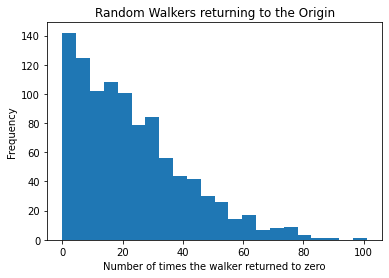



Average number of times a walker returned to the origin:  22.918


Standard deviation of the number of times a walker returned to the origin:  17.91740148570657


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# function to decide step left or right
def getStep() :

    step = np.random.randint( 2 )
    #step is 0 or 1, want -1 or +1
    if step == 0 :
        step = -1

    return step

def takeSteps( N ) : 
    
    x = 0 #current location
    i = 0 # index
    counter = 0
    while i <= N-1 :
        step = getStep()
        x = x + step
        if x == 0:
            counter+=1  
        i = i + 1

    return x,counter

# number of steps in each walk
N = 1000

# number of walks to take
walks = 1000

# list of final point of each walk
xList = []
xCounter = []

# perform walks number of walks
i = 0
while i <= walks - 1 :
    x,counter = takeSteps( N )
    xList.append( x )
    xCounter.append(counter)
    i = i + 1

# get out some statistics

# get the mean final position
mean = np.mean( xList )
#print( "mean final position = " , mean )

# get the experiment variance
var = np.var( xList )
#print( "variance of final position = " , var )

# get the experiment std dev
std = np.sqrt( var )
print( "std dev of final position = " , std )

# get a histogram of the results
histogram = np.histogram( xList )

'''
# plot a histogram
plt.hist( xList , bins='auto')
plt.title("Histogram of final positions")
plt.show()
'''

# plot a histogram
plt.hist( xCounter , bins='auto')
plt.title('Random Walkers returning to the Origin')
plt.xlabel('Number of times the walker returned to zero')
plt.ylabel('Frequency')
plt.show()
print('\n\nAverage number of times a walker returned to the origin: ', np.mean(xCounter))
print('\n\nStandard deviation of the number of times a walker returned to the origin: ', np.std(xCounter))

## **Question 3**

$$ y'' + 3y' + 8y = 0 $$

$$ y(0) = 1 , y(1) = 2 $$

$$ \iff\frac{ f(x_{k + 1}) - f(x_{k-1}) - 2f(x_k) }{ \delta^2 } + \frac{ 3(f(x_{k + 1}) - f(x_{k-1}))}{ 2\delta } + 8f(x_k) = 0 $$


$$ \iff\frac{ y_{k + 1} - y_{k-1} - 2y_k }{ \delta^2 } + \frac{ 3\delta(y_{k + 1} - y_{k-1})}{ 2\delta^2 } + \frac{8\delta(y_k)}{\delta^2} = 0 $$

$$ \iff(1 - \frac{3\delta}{2})y_{k-1} +(8\delta^2-2)y_k+ (1 + \frac{3\delta}{2})y_{k+1} = 0$$

We will have N-2 such equations with the above equation being the kth such equations

And $y_0 = 1$ and $y_{N-1} =2 $
$$\implies
\begin{pmatrix}
1 &    &    &    &  \\
(1 - \frac{3\delta}{2}) & (8\delta^2-2) & (1 + \frac{3\delta}{2})  &    &  \\
  & (1 - \frac{3\delta}{2})  & (8\delta^2-2) & (1 + \frac{3\delta}{2})  &   \\
  &    & (1 - \frac{3\delta}{2})  & (8\delta^2-2) & (1 + \frac{3\delta}{2}) \\
  &    &    &    &  1 \\ 
\end{pmatrix}
\begin{pmatrix}
y_0 \\
y_1 \\
y_2 \\
y_3 \\
y_4 \\
\end{pmatrix} ~=~ 
\begin{pmatrix}
1 \\
0  \\
0  \\
0 \\
2 \\
\end{pmatrix}  
$$
We will solve this system $AY=B$ to get the vector $Y$. Note that this system is represented for 5 nodes and it will follow a similar tridiagnal matrix pattern for A and extended vector forms for Y and B for 101 nodes.

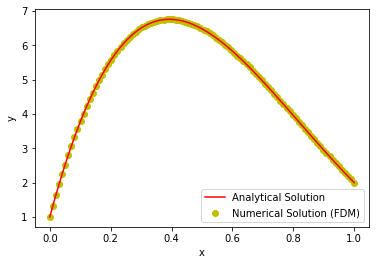

In [ ]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg

N = 100

x, delta = np.linspace( start=0, stop=1, num=N , retstep=True )

diag1 = np.ones( N-1 ) - 1.5*delta
diag1[N-2] = 0.0 

diag2 = np.ones(  N )
diag2 = -2*diag2 + 8*(delta**2)
diag2[0] = 1
diag2[N-1] = 1

diag3 = np.ones( N-1 ) + 1.5*delta
diag3[0] = 0.0

A = sp.diags( [diag1,diag2,diag3] , [-1,0,1] , format='csr' )

b = np.zeros( N )
b[0] = 1 
b[N-1] = 2

result = scipy.sparse.linalg.spsolve( A , b )
y = []
for i in range (len(x)):
  y.append(((-1)*math.exp((-3*x[i])/2)/math.sin((23**0.5)/2))*(math.sin(((23**0.5)/2)*(x[i]-1))-(2*math.exp(3/2)*(math.sin(((23**0.5)/2)*(x[i]))))))

plt.plot(x, y, label = 'Analytical Solution', color = 'r')
plt.scatter(x, result, label = 'Numerical Solution (FDM)', color = 'y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## **Question 4**

Monte Carlo integration is a numerical method for computing complex definite integrals which lack closed form analytical solutions. We numerically approximate the integral as a sum. We consider reimann sum for this. Area under the curve is divided into small rectangular/trapezoidal pieces and sum of their individual area is calculated. For reimann sum in Monte Carlo; we take the sub-intervals, of the integral limits, randomly(to divide the area under the curve). We consider high number of these random samples and get the sum of sub-intervals of definite integral for each sub interval. It is then averaged by dividing the sum by the number of random samples considered.

$$ \theta = \int_a^b g(x) dx $$


$$ \implies\theta_{hat} = \frac{1}{n} \sum\limits_{i = 1}^{n}{\theta_i} = \frac{b-a}{n} \sum\limits_1^n g(a+(b-a)u_i) $$


$$ \theta = \int_3^5 (e^{x^2}) dx $$


$$ \implies\theta_{hat} = \frac{5-3}{n} \sum\limits_{i = 1}^{n}{(e^{(3+(5-3)u_i)}}^2) $$

n = number of samples considered

$u_i$ = ith uniform random number generated by U(0;1) i.e. uniform random number generator between 0 and 1 

In a nutshell in this algorithm, random numbers are chosen (between the limits using U(0; 1)), the function is evaluated at those points, area is calculated and summed, and then it is scaled by a known factor.

The algorithm is implemented in code in the cell below.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
  
  return np.exp(x**2)

def montecarlo(func,a,b,n):

  subsets = np.arange(0,n+1,n/10)
  steps = n/100
  u = np.zeros(n)
  for i in range(10):
      start = int(subsets[i])
      end = int(subsets[i+1])
      u[start:end] = np.random.uniform(low=0.0, high=1.0, size=end-start)
  np.random.shuffle(u)
  u_func = f1(a+(b-a)*u)
  s = ((b-a)/n)*u_func.sum()
  return s

theta = 7.354152303292008 * 10**9
theta_hat = montecarlo(f1, 3, 5, 100000000)
print('\nActual value of given integral: ', theta)
print('\n\nMonte Carlo integration value: ', theta_hat)
print('\n\nCorrect to 4 significant figures for 100000000 random sampled subintervals (Reinman sum averaged)')


Actual value of given integral:  7354152303.292008


Monte Carlo integration value:  7354762588.183157


Correct to 4 significant figures for 100000000 random sampled subintervals (Reinman sum averaged)


## **Question 5**

$$  3x + 4y = 1  $$

$$  -5x + 2y = 2  $$

$$\iff$$

$$ AX = B $$

$$\iff$$
\begin{equation}
  \begin{bmatrix}
    3 & 4 \\
    -5 & 2  
  \end{bmatrix}
  %
  \begin{bmatrix}
    x \\
    y
  \end{bmatrix} 
=
\begin{bmatrix}
    1     \\
    2      
    \end{bmatrix} 
\end{equation}

$$\iff$$

$$ LUX = B $$

$$\iff$$

\begin{equation}
\begin{bmatrix}
    1 & 0 \\
    -5/3 & 1  
  \end{bmatrix}
  %
  \begin{bmatrix}
    3 & 4 \\
    0 & 26/3  
  \end{bmatrix}
  %
  \begin{bmatrix}
    x \\
    y
  \end{bmatrix} 
=
\begin{bmatrix}
    1     \\
    2      
    \end{bmatrix} 
\end{equation}

Will Solve $$  LY=B$$

$$\iff$$

\begin{equation}
\begin{bmatrix}
    1 & 0 \\
    -5/3 & 1  
  \end{bmatrix}
  %
  \begin{bmatrix}
    x_1\\
    y_1
  \end{bmatrix} 
=
\begin{bmatrix}
    1     \\
    2      
    \end{bmatrix} 
\end{equation}

Then $$ UX = Y $$

$$\iff$$

\begin{equation}
\begin{bmatrix}
    3 & 4 \\
    0 & 26/3  
  \end{bmatrix}
  %
  \begin{bmatrix}
    x\\
    y
  \end{bmatrix} 
=
\begin{bmatrix}
    x_1     \\
    y_1      
    \end{bmatrix} 
\end{equation}

From  $$ LY = B $$

$$\implies$$

$$ x_1 = 1 $$
$$ y_1 = 11/3 $$

Plugging these into $$ UX = Y $$

$$\implies$$

$$ x = -3/13 $$
$$ y = 11/26 $$

These values were also cross-checked for the given system and they satisfy both equations 